# Stage 1: Data & EDA

## Introduction

In this notebook, we perform an in-depth exploratory data analysis (EDA) on a customer dataset for churn prediction. Our goals are:

- Understand the data structure
- Identify feature distributions
- Detect missing values
- Explore relationships between features and churn
- Prepare insights for modeling

## Data Loading & Basic Info

In [1]:
import pandas as pd

df = pd.read_csv("/Users/Cathaml/Desktop/raw_data.csv", header=0, low_memory=False)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Overview

In [2]:
# Basic information
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


From the dataset overview, we observe the following:

- **Shape and Columns**: The dataset contains 7,043 records (customers) and 21 columns capturing various information, such as demographics, service subscriptions, billing, and churn status.
- **Missing Values**: No missing values were detected, indicating that the dataset is clean and ready for analysis without the need for imputation.
- **Data Types**: The columns consist of a mix of numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) and categorical features (`Contract`, `InternetService`, `PaymentMethod`, etc.).

**Numerical Summary Insights**

- **Tenure**: 
  - Customers have a median tenure of 29 months, with a range from 0 to 72 months. 
  - 25% of customers have tenure less than 9 months, suggesting a significant proportion of relatively new users.

- **MonthlyCharges**:
  - The average monthly charge is about $64.76, with a minimum of $18.25 and a maximum of $118.75.
  - The spread suggests that customers use different combinations of services.

- **SeniorCitizen**:
  - About 16% of customers are classified as senior citizens (`SeniorCitizen` mean = 0.16), while the majority are not.
  - This demographic factor might be important for churn prediction.

## Missing Values Analysis

In [3]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

We explicitly checked for missing values in all columns. The output confirms that there are **no missing values** in this dataset, allowing us to proceed directly to feature analysis and visualization without any imputation steps.

## Feature Distributions

In this section, we explore the distributions of the numerical features to understand their underlying patterns and detect potential anomalies or segmentation opportunities.

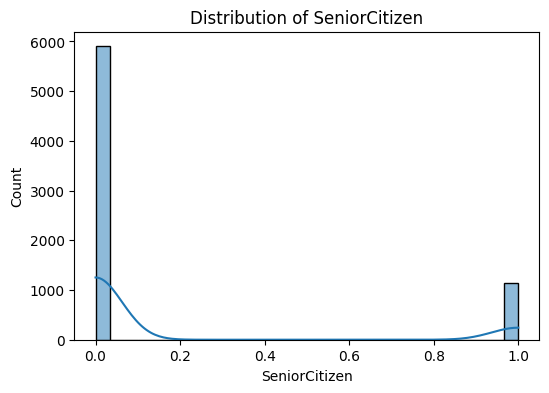

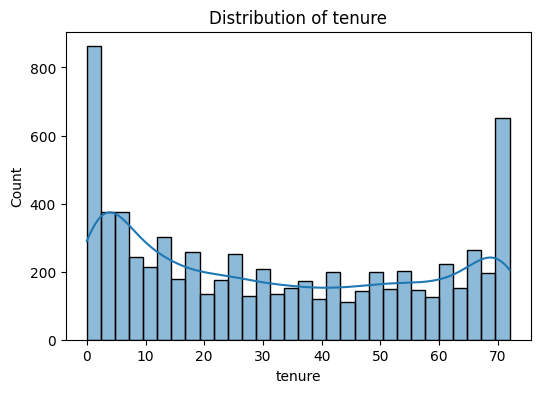

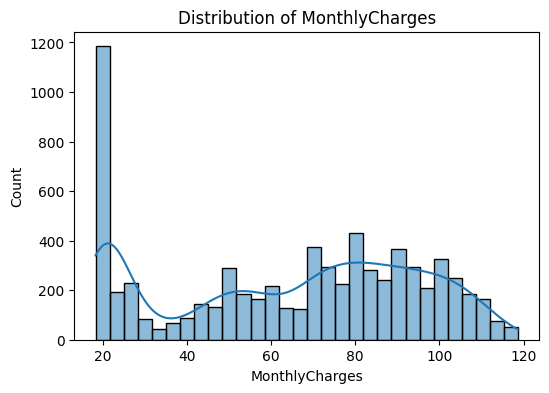

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

#### **SeniorCitizen**

The `SeniorCitizen` feature is a binary variable, where the majority of customers are not senior citizens (0), and only a small proportion are senior citizens (1). This indicates that the customer base mainly consists of younger individuals. Knowing this can help us understand how age might relate to churn risk.

#### **Tenure**

The `tenure` feature (customer tenure in months) shows a bimodal distribution. There is a noticeable peak among new customers (low tenure) and another peak among long-term customers (high tenure). This suggests a potential segmentation of customers into new and loyal groups, which could be crucial for targeted retention strategies.

#### **MonthlyCharges**

The `MonthlyCharges` variable is right-skewed, with most customers paying lower to moderate monthly charges, and fewer customers paying higher amounts. This skewness should be taken into consideration when modeling or creating segments, as it may influence the relationship with churn.

---

**Key Takeaways:**

- These distributions provide insight into customer composition and payment patterns.
- They will help inform further feature engineering, customer segmentation, and churn prediction strategies.

## Categorical Features Analysis

To understand the distribution of categorical features, we plotted countplots for each categorical column. This helps us visualize the balance of each category and identify potential class imbalances.

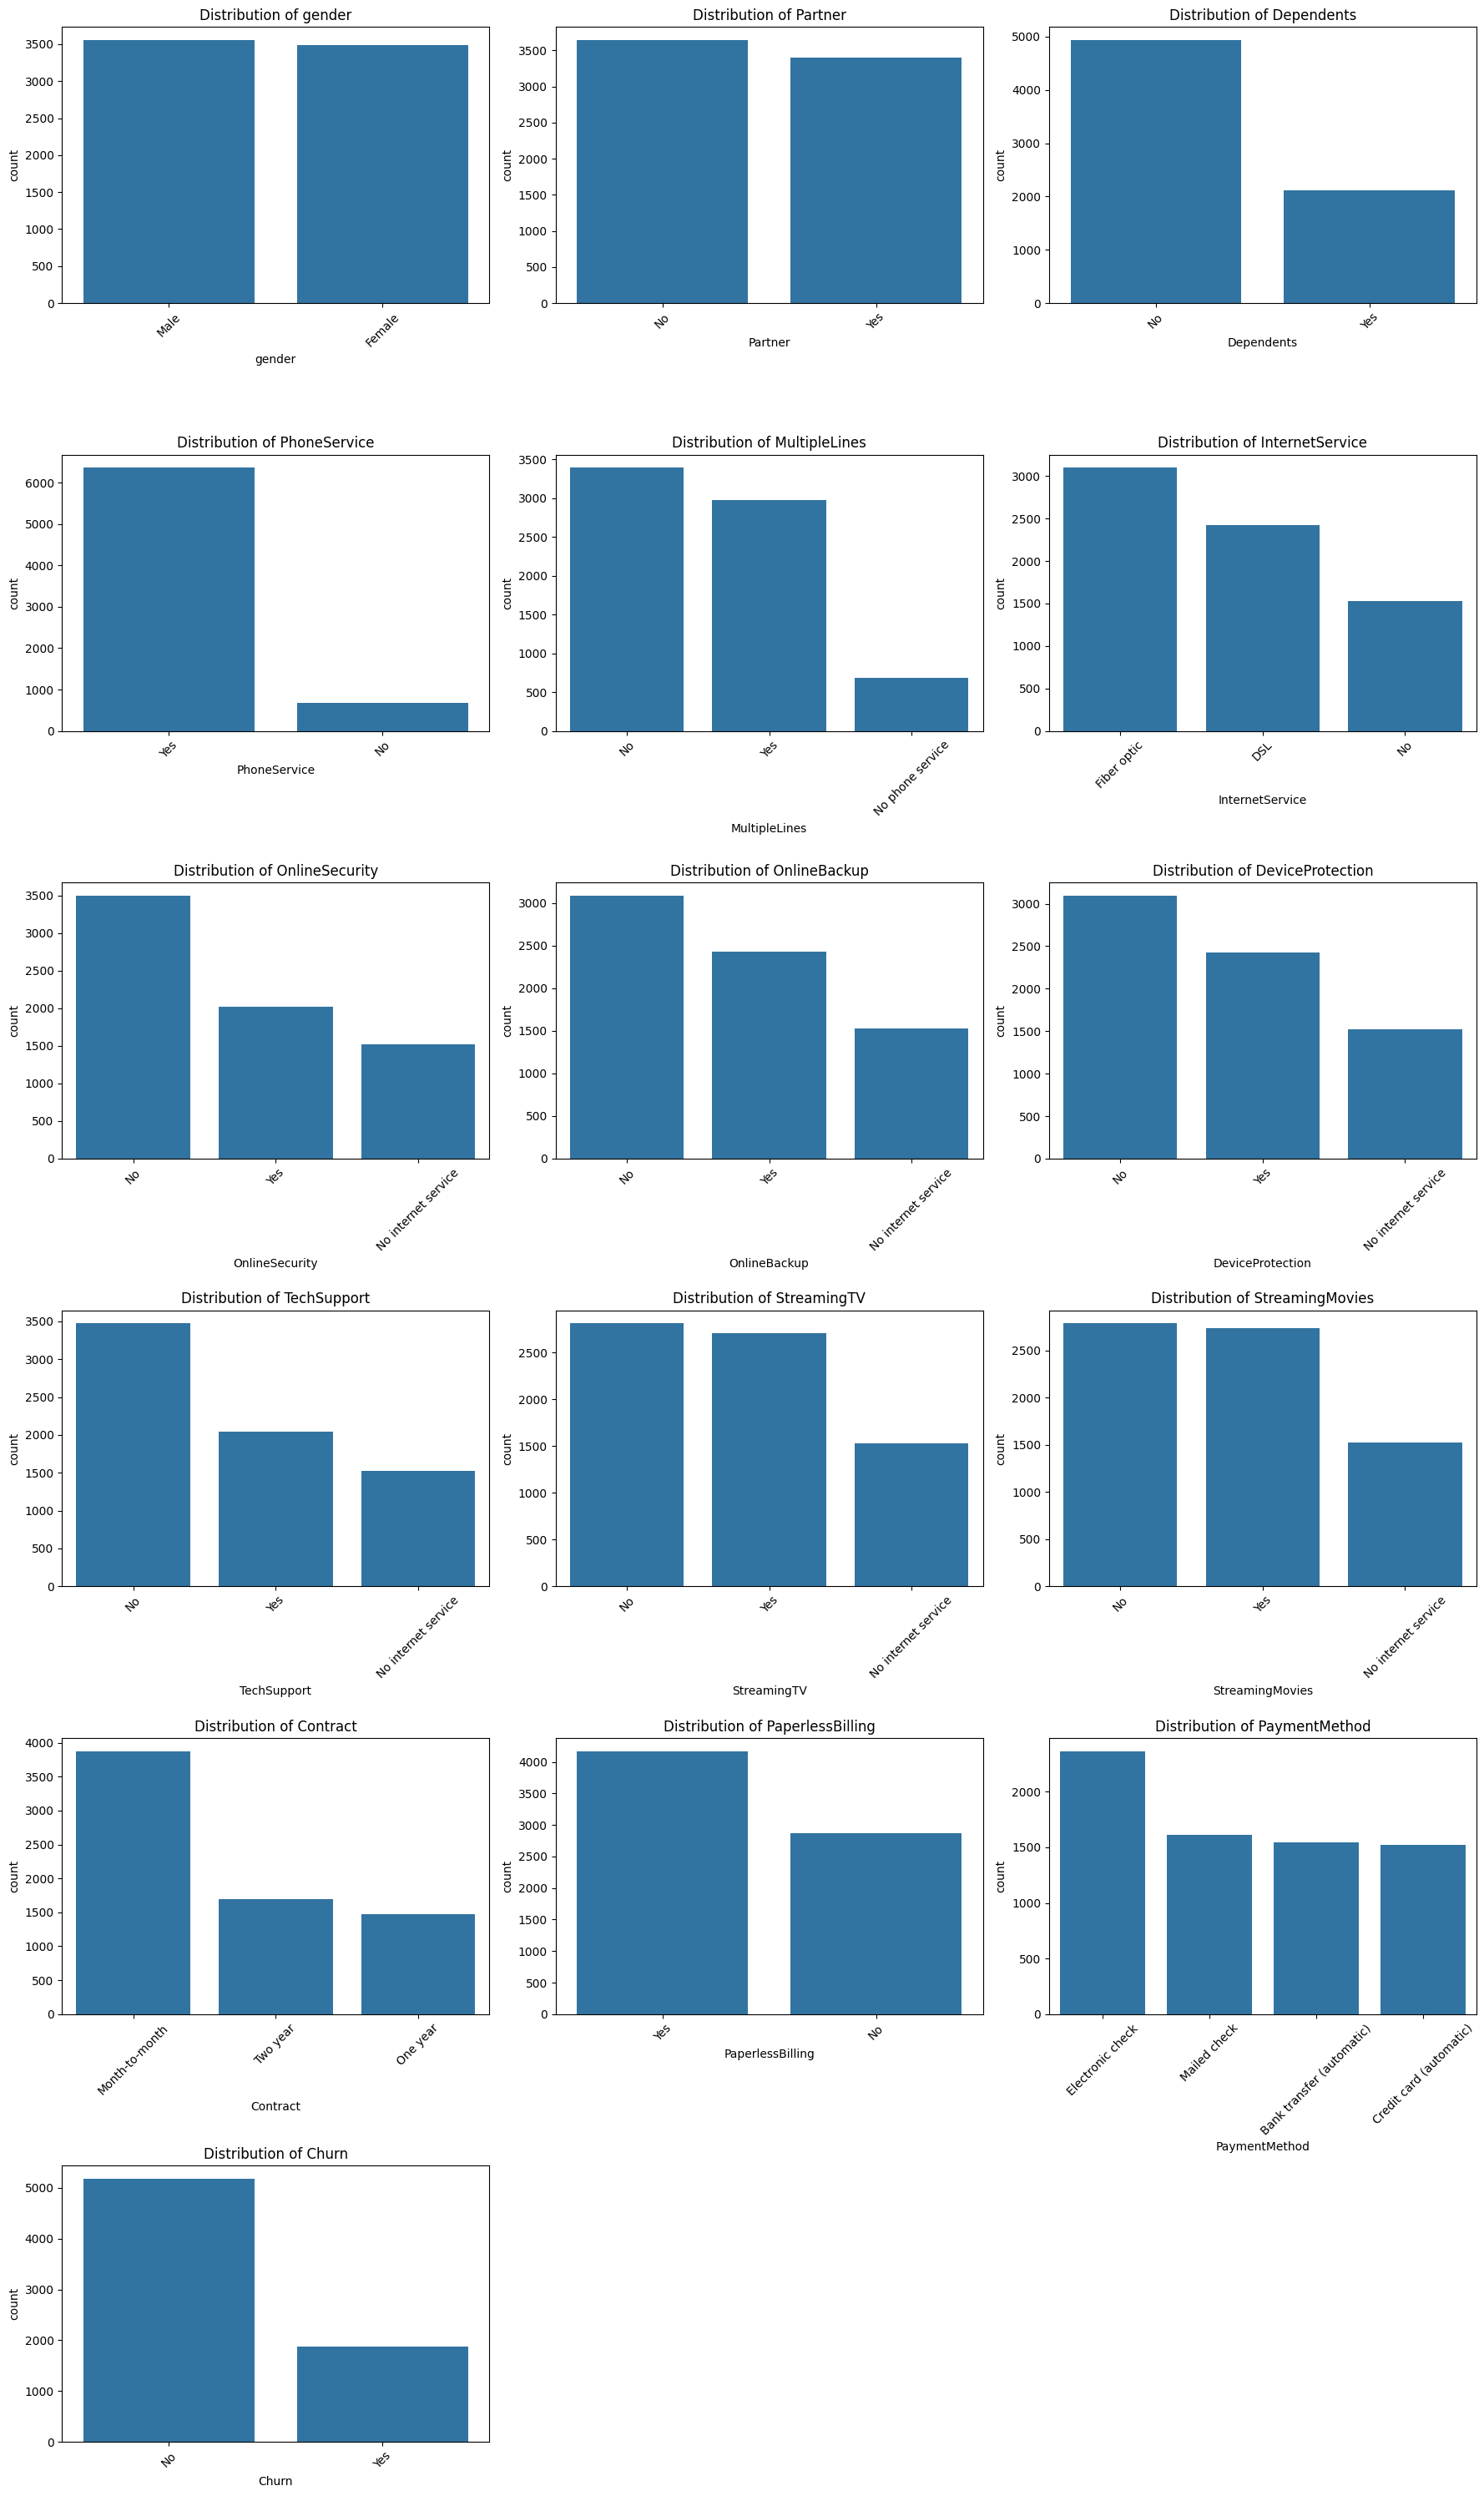

In [5]:
# Convert TotalCharges to numeric (handle any errors as NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Select categorical columns (exclude customerID and TotalCharges)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col not in ['customerID', 'TotalCharges']]

# Define grid layout
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each categorical feature
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Gender and Partner**: Both are relatively balanced across categories.
- **Dependents**: The majority of customers do not have dependents.
- **PhoneService**: Most customers have phone service.
- **MultipleLines**: Slightly more customers do not have multiple lines.
- **InternetService and related services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)**: We see diverse distributions, with many customers lacking additional security and support services.
- **Contract**: Most customers are on month-to-month contracts, which might relate to higher churn.
- **PaperlessBilling**: Slightly more customers use paperless billing.
- **PaymentMethod**: Electronic check is the most common payment method.
- **Churn**: There is a notable imbalance, with more customers not churning than churning.

These distributions provide insights that will help guide feature engineering and further analysis, especially when exploring churn drivers.

## Correlation analysis (for numerical features)

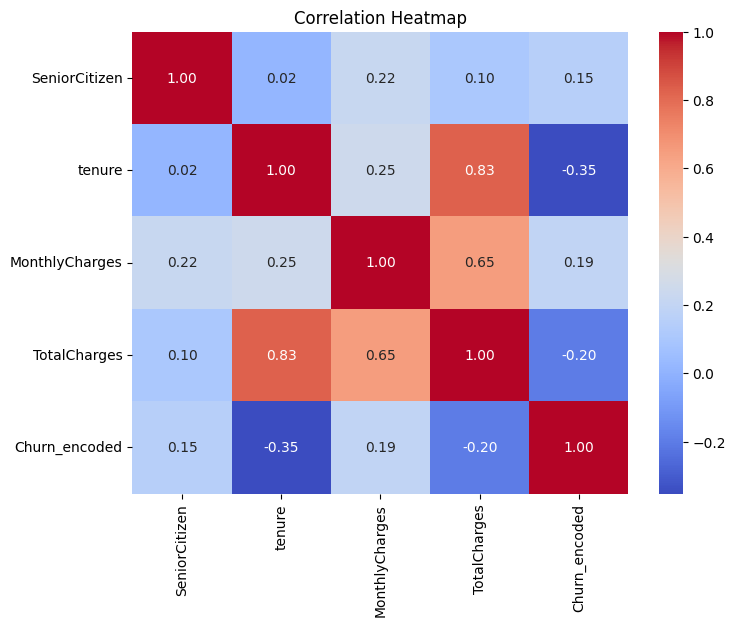

In [6]:
# Encode 'Churn' temporarily for correlation analysis
df_corr = df.copy()
df_corr['Churn_encoded'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

We analyzed the correlation among numerical features and the target variable (`Churn_encoded`).

- **Tenure** shows a moderate negative correlation with churn (-0.35). This suggests that customers with longer tenure are less likely to churn.
- **MonthlyCharges** has a slight positive correlation with churn (0.19). Customers paying higher monthly charges may be more likely to churn.
- **TotalCharges** has a weak negative correlation with churn (-0.20), possibly because customers who stay longer accumulate higher total charges and are less likely to leave.
- **SeniorCitizen** shows a very weak positive correlation (0.15) with churn.

Overall, tenure appears to be the strongest indicator among numerical features for predicting churn.

## Explore relationships with Churn

###  Categorical vs Churn

To further understand how each categorical feature relates to customer churn, we plotted count plots with churn as the hue. 

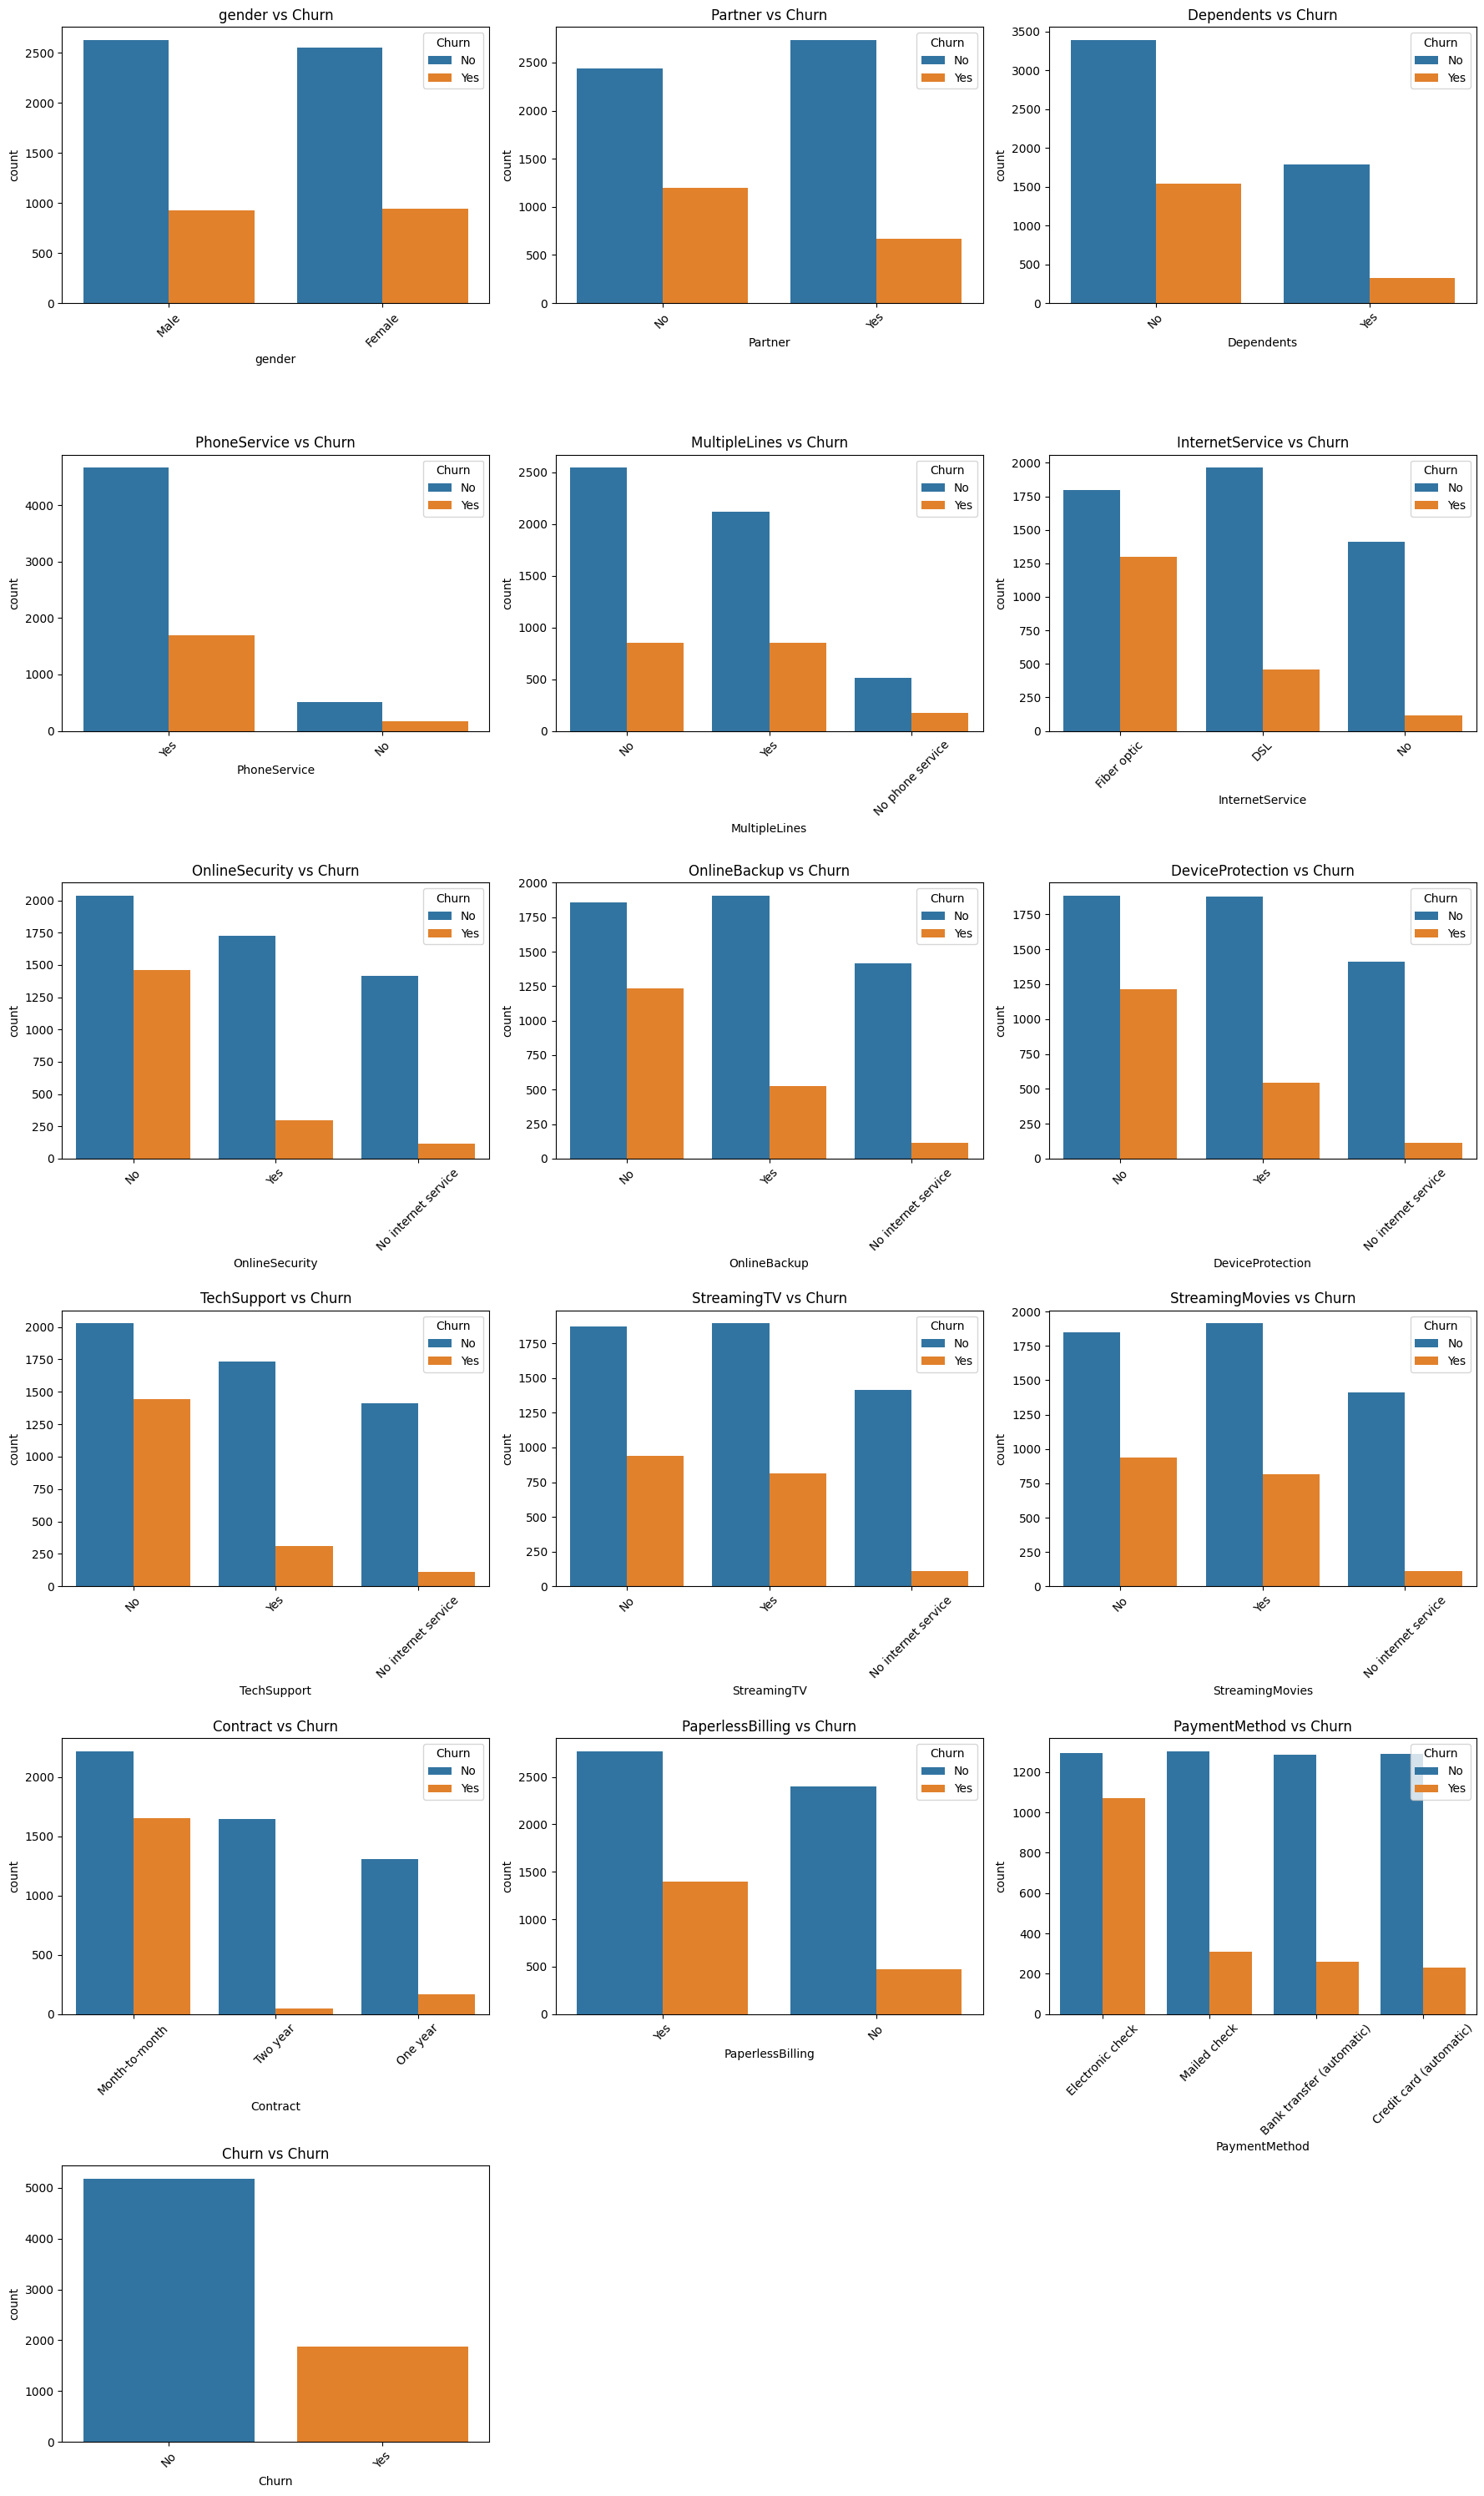

In [7]:
# Select categorical columns (excluding 'customerID' and 'Churn' if already encoded)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col not in ['customerID']]

# Set up grid
n_cols = 3
n_rows = int(len(cat_cols) / n_cols) + (len(cat_cols) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# Draw plots
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From these plots, we can make the following observations:

- Customers with no partner or dependents seem to churn more often.
- Customers on a month-to-month contract appear to churn much more than those with longer contracts (one or two years).
- Customers who use electronic checks as a payment method tend to have higher churn rates.
- Services such as OnlineSecurity, TechSupport, and InternetService show clear differences in churn distribution, suggesting these features may be important predictors.

### Numerical Features vs Churn

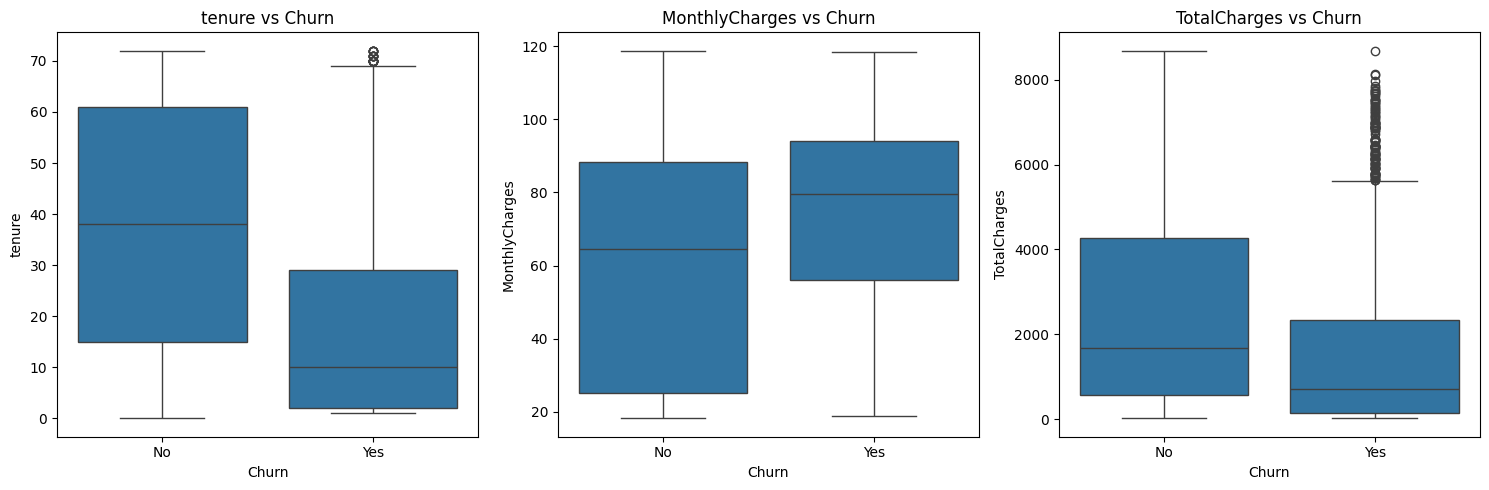

In [8]:
# List of numerical columns you want to analyze
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the figure grid
fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 5))

# Create boxplots for each numerical column vs churn
for i, col in enumerate(num_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

We explored the relationship between numerical features (`tenure`, `MonthlyCharges`, and `TotalCharges`) and churn using boxplots.

- **Tenure vs Churn**: Customers who churned tend to have a significantly lower tenure, indicating they are relatively new customers.
- **MonthlyCharges vs Churn**: Customers who churned tend to have slightly higher monthly charges compared to non-churned customers. This suggests that higher monthly costs might lead to dissatisfaction and churn.
- **TotalCharges vs Churn**: Customers who churned generally have lower total charges, which is consistent with their shorter tenure.

The outliers seen in `TotalCharges` indicate that some customers accumulate large total charges if they stay for a long period. This reinforces the pattern that longer-tenure customers tend to stay (no churn), resulting in higher total charges.

These insights highlight tenure and charges as important factors to consider when modeling churn.

### Handling Missing Values

In some versions of this Telco dataset, `TotalCharges` is object type because it may contain blank strings.

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


After converting `TotalCharges` to numeric, we discovered 11 missing values, likely due to blank entries in the original data. Since this represents a very small portion of the dataset (about 0.16%), we chose to drop these rows to avoid introducing potential bias.

In [10]:
df = df[df['TotalCharges'].notnull()]
df = df.reset_index(drop=True)

# Save cleaned dataset
df.to_csv("/Users/Cathaml/Desktop/cleaned_telco_data.csv", index=False)

## ✅ Summary & Next Steps

- The dataset contains **7,032 rows** and **21 features** after removing 11 rows with missing `TotalCharges` values.
- We identified **1 feature** (`TotalCharges`) with missing values, which have been dropped to maintain data quality.
- The churn class distribution shows an **imbalance**, with approximately 27% churned customers and 73% non-churned customers.
- Key features such as `tenure`, `MonthlyCharges`, and `Contract` show meaningful differences between churned and non-churned groups, indicating their potential predictive power.
- **Next steps**: Encode categorical features, scale numerical variables if needed, and build predictive models to identify customers at risk of churning.